# Regularization에 대해 알아보자

regularization을 구글 번역기를 돌리면 정규화, 혼공머 책에서는 규제, 그리고 이번 F25 노드에서는 정칙화라고 부른다.

# 1. Regularization, Normalization

regularization과 norrmalization을 구글 번역기 돌렸을 때 정규화라고 나와서 개념이 헷갈릴 수 있으므로 정리해보자.   
__regularization__ 오버피팅을 해결하기 위한 방법 중 하나이고, 그 외에 L1, L2 regularization, dropout, batch normalization 등이 있다. train set의 정답을 맞히지 못하도록 오버피팅을 방해하는 역할을 한다.   
__normalization__ 데이터의 형태를 의미있거나 트레이닝에 적합하게 전처리하는 과정이다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용해 0과 1사이의 값으로 분포를 조정한다. 피처 값들간의 범위 분포에 따라 왜곡되어 과의존성을 갖게 되는 경우가 있으므로, 모든 피처의 범위 분포를 동일하게 바꿔주는 전처리 과정이다.   

[Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) 회귀 문제를 통해 비교해보자.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


virginica의 petal length(꽃잎 길이), sepal length(꽃받침의 길이)를 추출했다.

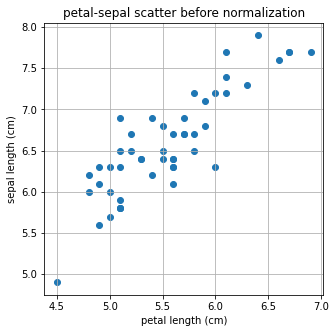

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

그래프를 봤을 때 cm의 분포가 그대로 나와있다. normalization을 하는 minmax_scale로 다시 재할당하고 확인해보자

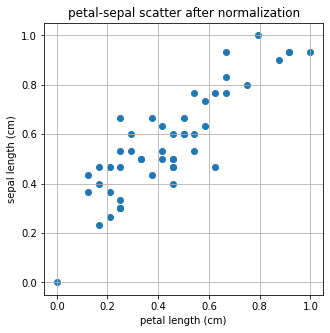

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

피처의 스케일이 0~1 사이로 변환되었으므로, 피처의 관계를 다루기 용이해졌다. regularization에 대해 알아보자.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


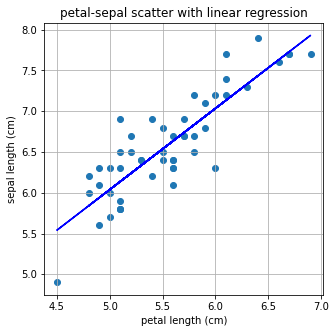

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

L1 regularization인 Lasso와 L2 regularization인 Ridge를 이용해 regularization을 하고 결과물을 시각화해보자.

기울기 : 0.00, 절편 : 6.59


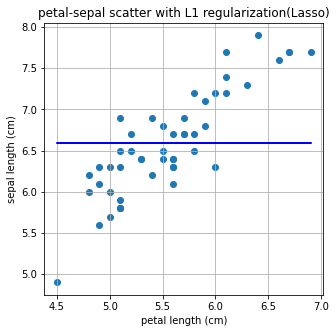

In [7]:
#L1 regularization은 Lasso로 import
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


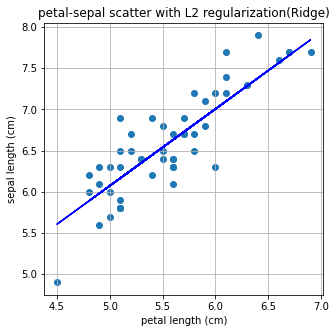

In [8]:
#L2 regularization은 Ridge로 import
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Linear Regression이 L2 Norm과 관련이 있어 ridge를 적용했을 땐 처음 데이터와 큰 차이가 없어보인다. 왜 L1은 저렇게 나왔을까?

# 2. L1 Regularization

L1 regularization을 사용할 때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터만 효과를 볼 수 있다. [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)으로 한번 구현해보자. 총 13개의 값을 갖는 데이터이다.

In [9]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [10]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred)) # 절대 오차
print('Mean Squared Error:', mean_squared_error(y_test, pred)) # 제곱 오차
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred))) # 평균 제곱값 오차

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


그리고 L1 lasso를 적용하고난 후 결과를 확인해보자.

In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델 훈련
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트
pred = L1.predict(X_test)

# 모델 성능
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


coeifficient 부분이 크게 두드러져있다. 그리고 13개중 6개의 값이 0으로 마감된걸 볼 수 있다.    
__수식은 다음과 같다.__

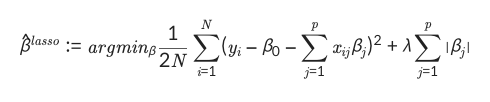

# 3. L2 Regularization

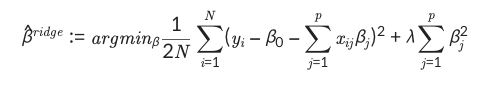

Lasso와 Ridge의 수식을 비교하면 끝부분 $B_j^2$ 부분이 크게 다르다. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/L1_and_L2_balls.svg/1024px-L1_and_L2_balls.svg.png)

직관적으로 이해를 해보자면 L1은 마름모 형태의 제약 조건이 생긴다. 점선 부분과 제약된 부분을 나타내는 선이 만나는 지점이 해가 된다. 그래서 L1 식을 보면 몇 개의 축의 $B$값을 0으로 보낸다. L2는 L2의 식을 보면 $B^2$로 제곱 형태로 들어가 있어 0에 가깝게 감을 확인할 수 있고, 수렴이 빠르다는 장점이 있다.

In [14]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


L1과 L2를 iteration 5로 두고 값을 비교해보자.

In [15]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [16]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


L2는 Linear Regression과 같은 값이 나오지만 L1은 같은 값이 하나도 없다. 정리하면 L1은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하고, L2는 0에 가깝게 보내지만 제곱이 있기 때문에 L1보다 수렴 속도가 빠르다. 예를들어 $A = [1,1,1,1,1]$, $B=[5,0,0,0,0]$의 경우 L1은 같은데 L2는 다르게 나온다.

# 4. Extra : LP norm

norm의 개념은 벡터뿐만 아니라 함수, 행렬에 대해서 크기를 구하는 것이다. 딥러닝에서는 주로 벡터, 행렬의 norm만 알면 된다고 한다.
### vector norm   
$p$, $x$의 값을 바꾸면서 확인해보자.

In [17]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


만약 $p$의 값이 자연수가 아닌 경우에는 어떻게 해야할까? $p = \infty$인 경우 가장 큰 숫자를 출력한다.

In [18]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


### matrix norm   
행렬의 norm은 $p = 1, \infty$인 경우만 알면 된다. 1인 경우에는 컬럼의 합이 가장 큰 값이 출력되고, $p = \infty$인 경우 로우의 합이 가장 큰 값이 출력된다.

In [19]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


# 5. Dropout

2014년에 나온 논문으로 [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://jmlr.org/papers/v15/srivastava14a.html) 링크를 통해 논문을 확인할 수 있다.   

dropout이 나오기 전 신경망은 FC architecture로 모든 뉴런들이 연결되어 있었다. 이름 그대로 모든 값을 뉴런과 연결하는게 아닌 확률적으로 버리면서 전달하는 기법이다. [Keras dropout](https://keras.io/api/layers/regularization_layers/dropout/)을 확인하면 간단하게 구현한걸 볼 수 있다.   

[fashion mnist](https://keras.io/api/datasets/fashion_mnist/) 데이터셋으로 실습해보자.

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # dropout 0.9
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4080 - accuracy: 0.4529
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1825 - accuracy: 0.5228
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1232 - accuracy: 0.5453
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0901 - accuracy: 0.5564
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0724 - accuracy: 0.5620


In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # dropout 레이어 삭제
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2961 - accuracy: 0.8917


dropout을 주지 않고 학습을 진행한 결과를 보면 높은 결과물이 나왔음을 볼 수 있다. dropout layer를 넣음으로써 학습이 안된 것을 볼 수 있다.   
이번에는 의도적으로 train set의 비율을 올려 overfitting이 되게 유도를하고 결과를 확인해보자.

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.0378 - accuracy: 0.5111 - val_loss: 1.6271 - val_accuracy: 0.6033
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.3916 - accuracy: 0.6144 - val_loss: 1.1677 - val_accuracy: 0.6717
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.6792 - val_loss: 0.9436 - val_accuracy: 0.7367
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8896 - accuracy: 0.7206 - val_loss: 0.8098 - val_accuracy: 0.7633
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.7380 - val_loss: 0.7308 - val_accuracy: 0.7700
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.7497 - val_loss: 0.6768 - val_accuracy: 0.7750
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.7603 - val_loss: 0.6443 - val_accuracy: 0.7883

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8631 - val_loss: 0.3929 - val_accuracy: 0.8350
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8640 - val_loss: 0.3919 - val_accuracy: 0.8433
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8645 - val_loss: 0.3902 - val_accuracy: 0.8400
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8652 - val_loss: 0.3904 - val_accuracy: 0.8417
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8656 - val_loss: 0.3899 - val_accuracy: 0.8400
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8652 - val_loss: 0.3899 - val_accuracy: 0.8367
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8664 - val_loss: 0.3841 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8833 - val_loss: 0.3461 - val_accuracy: 0.8567
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8829 - val_loss: 0.3476 - val_accuracy: 0.8600
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8827 - val_loss: 0.3449 - val_accuracy: 0.8583
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8838 - val_loss: 0.3439 - val_accuracy: 0.8583
Epoch 119/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8837 - val_loss: 0.3442 - val_accuracy: 0.8650
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8838 - val_loss: 0.3446 - val_accuracy: 0.8567
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8846 - val_loss: 0.3410 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.8945 - val_loss: 0.3216 - val_accuracy: 0.8783
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8949 - val_loss: 0.3253 - val_accuracy: 0.8733
Epoch 173/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8950 - val_loss: 0.3324 - val_accuracy: 0.8700
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8947 - val_loss: 0.3218 - val_accuracy: 0.8683
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.8942 - val_loss: 0.3186 - val_accuracy: 0.8750
Epoch 176/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8955 - val_loss: 0.3255 - val_accuracy: 0.8700
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.8950 - val_loss: 0.3252 - val_accuracy: 0.8800

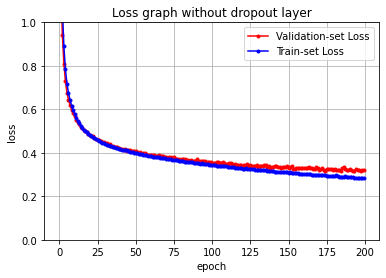

In [24]:
# loss값 확인
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

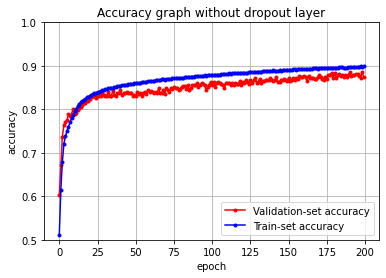

In [25]:
# accuracy값 확인
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # dropout layer 추가
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 2.0671 - accuracy: 0.4281 - val_loss: 1.6766 - val_accuracy: 0.5817
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4543 - accuracy: 0.5620 - val_loss: 1.2104 - val_accuracy: 0.6583
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1460 - accuracy: 0.6252 - val_loss: 0.9980 - val_accuracy: 0.6917
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9826 - accuracy: 0.6710 - val_loss: 0.8679 - val_accuracy: 0.7517
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8798 - accuracy: 0.6982 - val_loss: 0.7813 - val_accuracy: 0.7583
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8117 - accuracy: 0.7154 - val_loss: 0.7272 - val_accuracy: 0.7733
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.7284 - val_loss: 0.6897 - val_accuracy: 0.7767

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8505 - val_loss: 0.3901 - val_accuracy: 0.8417
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8514 - val_loss: 0.3908 - val_accuracy: 0.8400
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8521 - val_loss: 0.3908 - val_accuracy: 0.8333
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8523 - val_loss: 0.3871 - val_accuracy: 0.8467
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8537 - val_loss: 0.3846 - val_accuracy: 0.8400
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8548 - val_loss: 0.3860 - val_accuracy: 0.8450
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8554 - val_loss: 0.3815 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8721 - val_loss: 0.3420 - val_accuracy: 0.8600
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8727 - val_loss: 0.3386 - val_accuracy: 0.8550
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8723 - val_loss: 0.3380 - val_accuracy: 0.8583
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8730 - val_loss: 0.3398 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8728 - val_loss: 0.3342 - val_accuracy: 0.8600
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8740 - val_loss: 0.3387 - val_accuracy: 0.8583
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8751 - val_loss: 0.3374 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8840 - val_loss: 0.3168 - val_accuracy: 0.8733
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8833 - val_loss: 0.3160 - val_accuracy: 0.8800
Epoch 173/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8834 - val_loss: 0.3169 - val_accuracy: 0.8783
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8835 - val_loss: 0.3166 - val_accuracy: 0.8750
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8848 - val_loss: 0.3166 - val_accuracy: 0.8850
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8856 - val_loss: 0.3164 - val_accuracy: 0.8800
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8844 - val_loss: 0.3176 - val_accuracy: 0.8733

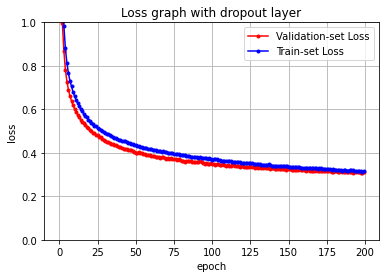

In [27]:
# loss값 확인
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

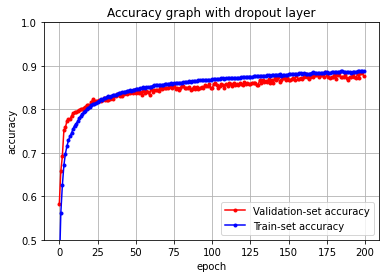

In [28]:
# accuracy값 확인
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

dropout layer 추가되면서 train-set의 accuracy가 더 높아지는 양상을 보여주고 있다.

# 6. Batch Normalization

batch normalization은 gradient vanishing, eplode 문제를 해결하는 방법이다. 2015년에 논문으로 나왔고 [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)을 보면 확인할 수 있다.   
적용할 수 있는 방법으로 mini-batch mean, mini-batch variance, normalize, scale and shift 방법이 있다. normalize의 경우 전처리 과정에서도 들어갔는데, 수식이 약간 다르다.

아무것도 하지 않은 FC 레이어와 batch normarlization을 추가한 모델을 비교해보자. 정확도 비교와 속도를 위주로 확인해보자.

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [30]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 27ms/step - loss: 1.2212 - accuracy: 0.6162 - val_loss: 0.7392 - val_accuracy: 0.7417
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.6491 - accuracy: 0.7786 - val_loss: 0.5934 - val_accuracy: 0.7993
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.8142 - val_loss: 0.5276 - val_accuracy: 0.8229
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5052 - accuracy: 0.8298 - val_loss: 0.5062 - val_accuracy: 0.8268
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 0.8356 - val_loss: 0.4767 - val_accuracy: 0.8364
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4555 - accuracy: 0.8455 - val_loss: 0.4607 - val_accuracy: 0.8408
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4394 - accuracy: 0.8501 - val_loss: 0.4458 - val_accuracy: 0.8467
Epoch 8/20
21/21 [=

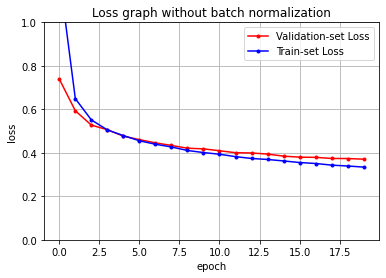

In [32]:
# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

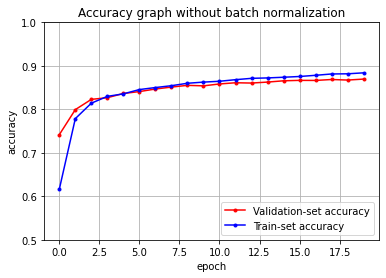

In [33]:
# accuracy
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # batchnormalization layer 추가
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 18ms/step - loss: 0.9914 - accuracy: 0.6721 - val_loss: 1.1055 - val_accuracy: 0.6324
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5208 - accuracy: 0.8246 - val_loss: 0.8816 - val_accuracy: 0.7314
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.8473 - val_loss: 0.7777 - val_accuracy: 0.7631
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8602 - val_loss: 0.6897 - val_accuracy: 0.8071
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.8686 - val_loss: 0.6377 - val_accuracy: 0.8208
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3634 - accuracy: 0.8757 - val_loss: 0.6037 - val_accuracy: 0.8251
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3461 - accuracy: 0.8816 - val_loss: 0.5648 - val_accuracy: 0.8338
Epoch 8/20
21/21 [=

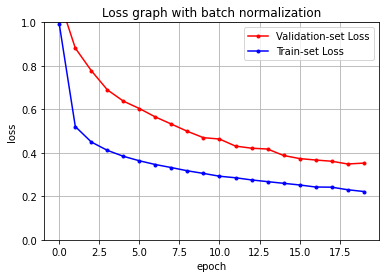

In [35]:
# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

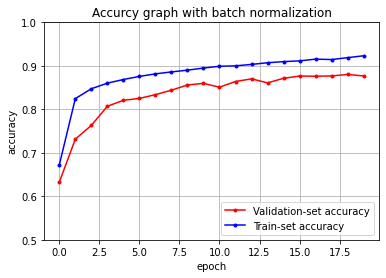

In [36]:
# accuracy
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

더 빠르게 정확도 상승이 있음을 확인할 수 있다. 그리고 loss 값의 감소도 더 빨라졌다. batch normalization으로 이미지가 정규화되면서 고른 분포를 갖게되고, 안정적인 학습이 가능해진다.